In [1]:
import asyncio
import random

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from urllib.request import urlopen
from json import loads
from functools import reduce

valid_years = ["2012", "2013", "2014", "2015", "2016"]

'''
Federal Information Processing Standards state code
'''
fips_mapping = { 1:"Alabama", 2:"Alaska",  3:"American Samoa", 4:"Arizona", 5:"Arkansas", 6:"California", 
                7:"Canal Zone", 8:"Colorado", 9:"Connecticut", 10:"Delaware", 11:"District of Columbia", 12:"Florida", 
                13:"Georgia", 14:"Guam", 15:"Hawaii", 16:"Idaho", 17:"Illinois", 18:"Indiana", 19:"Iowa", 20:"Kansas",
                21:"Kentucky", 22:"Louisiana", 23:"Maine", 24:"Maryland", 25:"Massachusetts", 26:"Michigan", 
                27:"Minnesota", 28:"Mississippi", 29:"Missouri", 30:"Montana", 31:"Nebraska", 32:"Nevada", 
                33:"New Hampshire", 34:"New Jersey", 35:"New Mexico", 36:"New York", 37:"North Carolina", 
                38:"North Dakota", 39:"Ohio", 40:"Oklahoma", 41:"Oregon", 42:"Pennsylvania", 43:"Puerto Rico", 
                44:"Rhode Island", 45:"South Carolina", 46:"South Dakota", 47:"Tennessee", 48:"Texas", 49:"Utah", 
                50:"Vermont", 51:"Virginia", 52:"Virgin Islands of the US", 53:"Washington", 54:"West Virginia", 
                55:"Wisconsin", 56:"Wyoming", 58:"Department of Defense Dependent Schools (overseas)", 
                59:"Bureau of Indian Education", 60:"American Samoa", 61:"Department of Defense Dependent Schools (domestic)", 
                63:"Department of Defense Education Activity", 64:"Federated States of Micronesia", 
                65:"Mariana Islands waters (including Guam)", 66:"Guam", 67:"Johnston Atoll", 68:"Marshall Islands", 
                69:"Northern Mariana Islands", 70:"Palau", 71:"Midway Islands", 72:"Puerto Rico", 
                74:"US Minor Outlying Islands", 75:"Atlantic coast from North Carolina to Florida, and the coasts of Puerto Rico and Virgin Islands", 
                76:"Navassa Island", 78:"Virgin Islands of the US", 79:"Wake Island", 81:"Baker Island", 84:"Howland Island", 
                86:"Jarvis Island", 89:"Kingman Reef", 95:"Palmyra Atoll", -1:"Missing/not reported", -2:"Not applicable", -3:"Suppressed data"
               }
'''
Method accepts array of urls
Returns concatenated dataframe with data from urls
'''        
def get_data_frames(urls):  
    dfs = []   
    for url in urls:
        count = 0
#         while url:
#Use the following while loop so I can fetch less urls before making this method async:
        while url and count < 4:
            print("Fetching data from", url)
            response = urlopen(url)
            data = loads(response.read())
            dfs.append(pd.DataFrame.from_dict(data["results"]))
            url = data["next"]
            print("Next url:", url)
            count+=1
    return pd.concat(dfs, ignore_index=True, sort=True)

In [2]:
'''
Unforunately, API does not have years past 2016.
Following loads district level financial data w/ "leaid": 
Local education agency identification number (NCES) as a common identifier.
'''
finance_urls = ["https://educationdata.urban.org/api/v1/school-districts/ccd/finance/{}/".format(yr) for yr in valid_years]
finance_df = get_data_frames(finance_urls)

Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=2
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=2
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=3
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=3
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=4
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=4
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=5
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2013/
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2013/?page=2
Fetching data from https://educationdata.urban.org/api/v1/s

In [3]:
finance_df.head()

,assets_bond_fund,assets_other,assets_sinking_fund,benefits_employee_instruction,benefits_employee_total,benefits_enterprise_operations,benefits_food_service,benefits_supp_bco,benefits_supp_general_admin,benefits_supp_instruc_staff,...,salaries_supp_operation_plant,salaries_supp_pupils,salaries_supp_sch_admin,salaries_supp_stud_transport,salaries_teachers_other_ed,salaries_teachers_regular_prog,salaries_teachers_sped,salaries_teachers_vocational,salaries_total,year
0,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2012
1,1069000,3455000,930000,4696000,7651000,0,475000,112000.0,174000,182000,...,941000,1285000,1524000,713000,355000,9816000,751000,781000,20503000,2012
2,3004000,6224000,1162000,6375000,11074000,0,781000,113000.0,307000,336000,...,1327000,1964000,2494000,1497000,521000,12736000,1749000,1026000,29562000,2012
3,4365000,82284000,26266000,19137000,30929000,0,1605000,319000.0,155000,1292000,...,4258000,4843000,6492000,3594000,1306000,45073000,3370000,1333000,85331000,2012
4,32515000,17892000,8730000,10515000,16767000,0,832000,333000.0,157000,1078000,...,2021000,2393000,3178000,1501000,815000,22564000,2857000,1324000,46318000,2012


In [4]:
'''
Unforunately, API does not have years past 2016.
Following loads district level student poverty data w/ "leaid": 
Local education agency identification number (NCES) as a common identifier.
'''

poverty_urls = ["https://educationdata.urban.org/api/v1/school-districts/saipe/{}/".format(yr) for yr in valid_years]
poverty_df = get_data_frames(finance_urls)

Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=2
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=2
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=3
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=3
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=4
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=4
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=5
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2013/
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2013/?page=2
Fetching data from https://educationdata.urban.org/api/v1/s

In [5]:
poverty_df.head()

,assets_bond_fund,assets_other,assets_sinking_fund,benefits_employee_instruction,benefits_employee_total,benefits_enterprise_operations,benefits_food_service,benefits_supp_bco,benefits_supp_general_admin,benefits_supp_instruc_staff,...,salaries_supp_operation_plant,salaries_supp_pupils,salaries_supp_sch_admin,salaries_supp_stud_transport,salaries_teachers_other_ed,salaries_teachers_regular_prog,salaries_teachers_sped,salaries_teachers_vocational,salaries_total,year
0,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2012
1,1069000,3455000,930000,4696000,7651000,0,475000,112000.0,174000,182000,...,941000,1285000,1524000,713000,355000,9816000,751000,781000,20503000,2012
2,3004000,6224000,1162000,6375000,11074000,0,781000,113000.0,307000,336000,...,1327000,1964000,2494000,1497000,521000,12736000,1749000,1026000,29562000,2012
3,4365000,82284000,26266000,19137000,30929000,0,1605000,319000.0,155000,1292000,...,4258000,4843000,6492000,3594000,1306000,45073000,3370000,1333000,85331000,2012
4,32515000,17892000,8730000,10515000,16767000,0,832000,333000.0,157000,1078000,...,2021000,2393000,3178000,1501000,815000,22564000,2857000,1324000,46318000,2012


In [6]:
'''
Unforunately, API does not have years past 2016.
And states: ['AL' 'AK' 'AZ' 'IL' 'CA' 'MI' 'MD' 'MN' 'TX' 'AR' 'NV']
Following loads geographic data w/ "leaid": 
Local education agency identification number (NCES) as a common identifier.
'''

geographic_urls = ["https://educationdata.urban.org/api/v1/school-districts/ccd/directory/{}/".format(yr) for yr in valid_years]
geographic_df = get_data_frames(finance_urls)

Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=2
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=2
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=3
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=3
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=4
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=4
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2012/?page=5
Fetching data from https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2013/
Next url: https://educationdata.urban.org/api/v1/school-districts/ccd/finance/2013/?page=2
Fetching data from https://educationdata.urban.org/api/v1/s

In [7]:
geographic_df.head()

,assets_bond_fund,assets_other,assets_sinking_fund,benefits_employee_instruction,benefits_employee_total,benefits_enterprise_operations,benefits_food_service,benefits_supp_bco,benefits_supp_general_admin,benefits_supp_instruc_staff,...,salaries_supp_operation_plant,salaries_supp_pupils,salaries_supp_sch_admin,salaries_supp_stud_transport,salaries_teachers_other_ed,salaries_teachers_regular_prog,salaries_teachers_sped,salaries_teachers_vocational,salaries_total,year
0,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2012
1,1069000,3455000,930000,4696000,7651000,0,475000,112000.0,174000,182000,...,941000,1285000,1524000,713000,355000,9816000,751000,781000,20503000,2012
2,3004000,6224000,1162000,6375000,11074000,0,781000,113000.0,307000,336000,...,1327000,1964000,2494000,1497000,521000,12736000,1749000,1026000,29562000,2012
3,4365000,82284000,26266000,19137000,30929000,0,1605000,319000.0,155000,1292000,...,4258000,4843000,6492000,3594000,1306000,45073000,3370000,1333000,85331000,2012
4,32515000,17892000,8730000,10515000,16767000,0,832000,333000.0,157000,1078000,...,2021000,2393000,3178000,1501000,815000,22564000,2857000,1324000,46318000,2012


In [8]:
df = pd.merge(finance_df, geographic_df, on=["leaid"])
df.head()

,assets_bond_fund_x,assets_other_x,assets_sinking_fund_x,benefits_employee_instruction_x,benefits_employee_total_x,benefits_enterprise_operations_x,benefits_food_service_x,benefits_supp_bco_x,benefits_supp_general_admin_x,benefits_supp_instruc_staff_x,...,salaries_supp_operation_plant_y,salaries_supp_pupils_y,salaries_supp_sch_admin_y,salaries_supp_stud_transport_y,salaries_teachers_other_ed_y,salaries_teachers_regular_prog_y,salaries_teachers_sped_y,salaries_teachers_vocational_y,salaries_total_y,year_y
0,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2012
1,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2013
2,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2014
3,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2015
4,-1,-1,-1,-1,-1,-1,-1,-1.0,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,2016


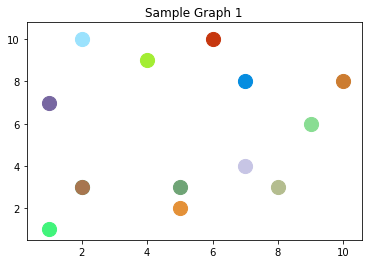

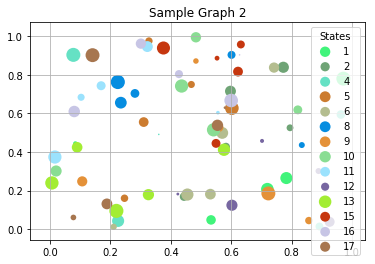

In [9]:
'''
Calculate total revenue 'rev_total' (fed, state, local) for all states.
'''
df.rename(columns={'fips_x':'State'}, inplace = True)
df.rename(columns={'year_y':'Year'}, inplace = True)

grouped_series = df.groupby(['State', 'Year'])['rev_total_x'].sum().reset_index(name='Total Revenue')

# num_years = len(grouped_series['Year'].unique())
state_codes = grouped_series['State'].unique()
years = grouped_series['Year'].unique()

colors = ["#"+''.join([random.choice('0123456789ABCDEF') for j in range(6)]) for i in range(len(grouped_series['State'].unique()))]

'''
Generate sample graphs using colors and random ints
'''

# Sample Graph 1
for i in range(len(state_codes)):
    plt.scatter(random.randint(0, 10), random.randint(0,10), c=colors[i], s=200)

plt.title('Sample Graph 1')
plt.show()
    
# Sample Graph 2  
fig, ax = plt.subplots()
for i in range(len(state_codes)):
    x, y = np.random.rand(2, len(years))
    scale = 200.0 * np.random.rand(len(years))
    ax.scatter(x, y, c=colors[i], s=scale, label=state_codes[i],
               alpha=1, edgecolors='none')

ax.legend(title='States')
ax.grid(True)

plt.title('Sample Graph 2')
plt.show()

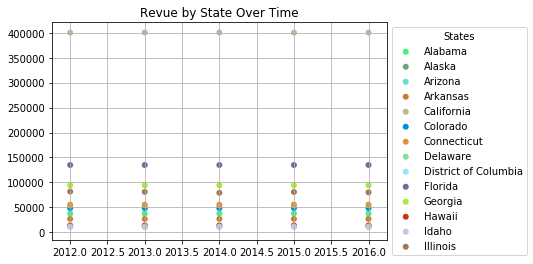

In [10]:
'''
Plot the total revenue 'rev_total' (fed, state, local) for all states by year
'''
fig, ax = plt.subplots()
for i in range(len(state_codes)):
    curr_state_code = state_codes[i]
    curr_total_revenues = grouped_series.loc[grouped_series['State'] == curr_state_code]['Total Revenue']/1000000
    
    if(len(curr_total_revenues) != len(years)):
        print("Missing some data for state: ", fips_mapping[curr_state_code], " . Skipping...")
    else:
        x , y =  years, curr_total_revenues
        ax.scatter(x, y, c=colors[i], label=fips_mapping[curr_state_code], alpha=1, edgecolors='none')

ax.legend(title='States', bbox_to_anchor=(1.0, 1.0))
ax.grid(True)

plt.title('Revue by State Over Time')
plt.show()

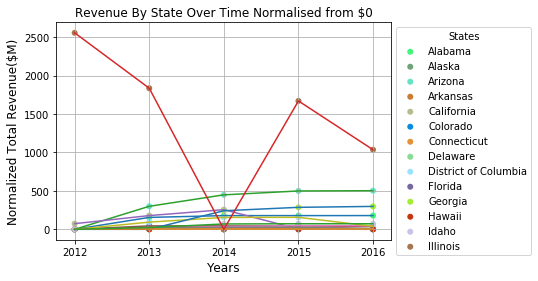

In [11]:
'''
Plot the total revenue 'rev_total' (fed, state, local) for all states by year starting at origin
'''
fig, ax = plt.subplots()

min_revenue = float('inf')
max_revenue = -1 * float('inf')

for i in range(len(state_codes)):
    curr_state_code = state_codes[i]
    curr_total_revenues = grouped_series.loc[grouped_series['State']== curr_state_code]['Total Revenue']
    
    curr_min = np.min(curr_total_revenues)
    revenue_normalizer = lambda t: (t - curr_min)/1000000
    normalized_revenues = np.array([revenue_normalizer(x) for x in curr_total_revenues])
    
    if(len(curr_total_revenues) != len(years)):
        print("Missing some data for state: ", fips_mapping[curr_state_code], " . Skipping...")
    else:
        x , y =  years, normalized_revenues
        plt.scatter(x, y, c=colors[i], label=fips_mapping[curr_state_code], alpha=1, edgecolors='none')
        plt.plot(x, y)

ax.legend(title='States', bbox_to_anchor=(1, 1))
ax.grid(True)

plt.title('Revenue By State Over Time Normalised from $0')
plt.xlabel('Years', fontsize=12)
plt.ylabel('Normalized Total Revenue($M)', fontsize=12)
plt.xticks(np.arange(np.min(years), np.max(years)+1, 1))

plt.show()